In [1]:
import cv2
import os
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

In [9]:
def showImg(img: cv2.typing.MatLike):
    # Convert BGR to RGB (OpenCV uses BGR by default)
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

def plot3DOld(data):
    x, y, z = np.meshgrid(np.arange(data.shape[0]), 
                      np.arange(data.shape[1]), 
                      np.arange(data.shape[2]))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize data values to range [0, 1] for alpha
    alpha = (data - data.min()) / (data.max() - data.min())

    scatter = ax.scatter(x, y, z, c=data, cmap='viridis', alpha=alpha.flatten(), depthshade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Visualization with Value-Based Opacity')

    cbar = plt.colorbar(scatter)
    cbar.set_label('Values')

    plt.show()

def plot3D(data):
    x, y, z = np.indices(data.shape)
    values = data.flatten()

    # Create the 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        mode='markers',
        marker=dict(
            size=5,
            color=values,
            colorscale='Viridis',
            opacity=0.1,  # Opacity based on values
            colorbar=dict(title='Value')
        )
    )])

    # Update layout for better visibility
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
        width=800,
        height=800,
        title='3D Scatter Plot of NDArray'
    )

    # Display the plot
    fig.show()

In [3]:
def get_edges(img: cv2.typing.MatLike, ksize=1):
    #calculating the derivatives/sobels on both axis
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
    
    #combining both axis sobels
    sobel = np.hypot(sobel_x, sobel_y)

    
    sobel = np.divide(sobel, sobel.max(), out=sobel)
    sobel = np.multiply(sobel, 255, out=sobel)
    
    #conversion to array of uint8 to free up space
    edges: np.ndarray[np.unit8] = np.uint8(sobel)

    return edges

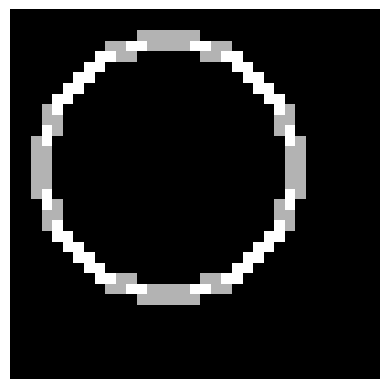

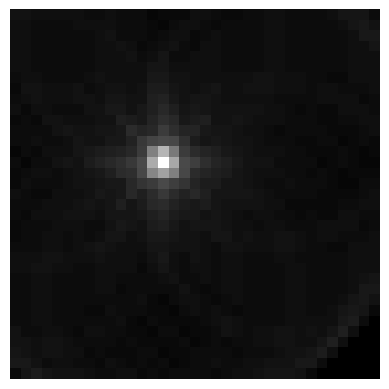

"acc = detect_circles('images/one.png',\n               1, 100, 1,\n               0, 100, 2,\n               0, 100, 2,\n               ksize=1)\n\nshowImg(acc[12])"

In [10]:
def detect_circles(path: str,
                   rad_min: int, rad_max: int, rad_step: int,
                   x_min: int, x_max: int, x_step: int,
                   y_min: int, y_max: int, y_step: int,
                   ksize: int=1):       #TODO this is dumb, replace these args with an "option" array later idk
    
    

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    img_width, img_height = img.shape[0], img.shape[1]

    wrongBounds = False
    wrongBounds = x_min < 0 or x_max > img_width or y_min < 0 or y_max > img_height or rad_min < 0
    
    if (wrongBounds):
        print("Error : Wrong dimensions")
        return

    #getting the image containing the edges
    edges_img = get_edges(img, ksize=ksize)
    showImg(edges_img)
    #iterating through the edges pixels
    threshold = 100     #minimum value for a pixel of edges_img to be considered as part of an edge
    
    #creating the accumulator
    acc_x_max = math.floor((x_max-x_min)/x_step)
    acc_y_max = math.floor((y_max-y_min)/y_step)
    acc_rad_max = math.floor((rad_max-rad_min)/rad_step)

    
    acc = np.zeros((acc_rad_max, acc_x_max, acc_y_max))

    
    for rad in range(rad_min, rad_max, rad_step):
        for x in range(x_min, x_max, x_step):
            for y in range(y_min, y_max, y_step):
                if (edges_img[x][y] > threshold):
                    
                    #FILLING THE ACCUMULATOR
                    X = math.floor((x-x_min)/x_step)
                    Y = math.floor((y-y_min)/y_step)
                    RAD = math.floor((rad-rad_min)/rad_step)
                    if RAD >= acc_rad_max:
                        continue

                    ang_step = 1/rad  #pretty much random I just found this value works well

                    for ang in np.arange(0, 2*math.pi, ang_step):   #drawing the circle
                        vote_x = math.floor(X+RAD*math.cos(ang))
                        if vote_x < 0 or vote_x >= acc_x_max:
                            continue
                        vote_y = math.floor(Y+RAD*math.sin(ang))
                        if vote_y < 0 or vote_y >= acc_y_max:
                            continue
                            
                        acc[RAD][vote_x][vote_y] += 1
                
                #print(rad, x, y)
                #edges_img[X, Y]
                #print("et")
                #acc[RAD, X, Y]
    return acc



acc = detect_circles('images/small.png',
               1, 35, 1,
               0, 35, 1,
               0, 35, 1,
               ksize=1)
showImg(acc[12])
plot3D(acc)

"""acc = detect_circles('images/one.png',
               1, 100, 4,
               0, 100, 1,
               0, 100, 1,
               ksize=1)
showImg(acc[23])"""

"""acc = detect_circles('images/one.png',
               1, 100, 1,
               0, 100, 2,
               0, 100, 2,
               ksize=1)

showImg(acc[12])"""

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]


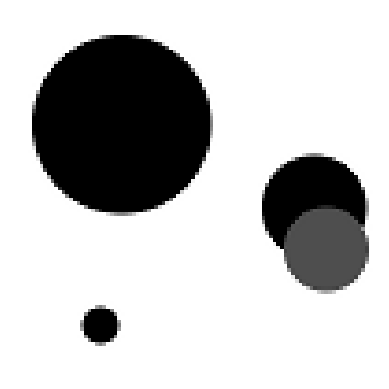

In [5]:
img = cv2.imread('images/four.png', cv2.IMREAD_GRAYSCALE)

print(img[0])
showImg(img)

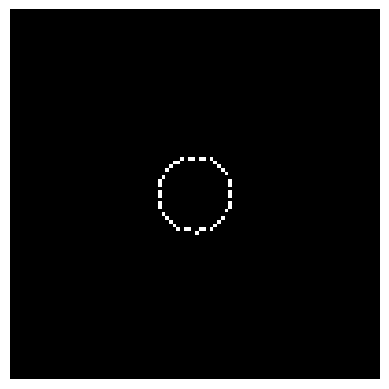

In [6]:
def fillAcc(x, y, rad):
    acc_x_max = 100
    acc_y_max = 100
    acc_rad_max = 100

    acc = np.zeros((acc_rad_max, acc_x_max, acc_y_max))
    
    ang_step = 1.5/rad  #pretty much random I just found this value works well

    for ang in np.arange(0, 2*math.pi, ang_step):
        vote_x = math.floor(x+rad*math.cos(ang))
        if vote_x < 0 or vote_x >= acc_x_max:
            continue
        vote_y = math.floor(y+rad*math.sin(ang))
        if vote_y < 0 or vote_y >= acc_y_max:
            continue

        acc[rad][vote_x][vote_y] += 1
    showImg(acc[rad])

fillAcc(50, 50, 10)